# **PROBLEM STATEMENT**  
Implement a Face Landmarking model using TensorFlow libraries and calculate the Golden ration of a human face.

**WHAT IS THE GOLDEN RATION?**  
The golden ratio, also known as the golden mean, is the value phi where  
$\varphi$ = (A+B)/A = A/B. The value so obatained is 1.618.

Many finding show how the golden ration coincides with beautiful art and architecuture. Therefore, this has further been extended to create a measure of how beautiful a human face is.

Golden ratios closer to the value of 1.618, indicate a high beauty according to the theory.

<br>

# **SOLUTION**
## **METHODOLOGY**
The approach followed was:  
First, check to see if the problem was solvable with in the given time frame;  hence the approach to use a pretrained model.  
Second, identify the formula to calcualted the golden ration with the given information.  
Last, test with other models.  

<br>

## **MODELS' DESCRIPTION**
### **MOBLIENET**
1. **DATASET**   
Since MobileNet is a pretrained model, there is no dataset required. The model was download from a Git Hub repository that can be found [here](https://github.com/davisking/dlib-models.git).

2. **MOBLIENET ARCHITECTURE**   
This architecture is a face landmarking model, model that identifies edges and feature of the face, that creates 68 points based on facial features. Only a few of the points are used to generate the golden ration.
<img src="https://iq.opengenus.org/content/images/2021/08/Mobilenet-v1-based-modified-SSD-network-architecture.jpg">


### **MODEL 2**   
This model was referenced from a blog to further explore CNN models as pre- trained model leave very little space for changing the model's archtiecture.

1. **DATASET**  
The dataset is from [kaggle](https://www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points?select=facial_keypoints.csv).
The dataset contains 7049 facial images along with a CSV file with 10 columns that serve as X and Y co-ordinated of important facical landmark points.

2. **ARCHITECTURE**  
The models architecture is described below. The original model by the creator would have taken a while to train and test. Therefore, the aim was to test the performance of the model in accurately drawing the landmarks with lesser convolution layer.


```
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 separable_conv2d (Separabl  (None, 92, 92, 64)        153       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 92, 92, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 92, 92, 64)        0         
                                                                 
 separable_conv2d_1 (Separa  (None, 88, 88, 64)        5760      
 bleConv2D)                                                      
                                                                 
 batch_normalization_1 (Bat  (None, 88, 88, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 88, 88, 64)        0         
                                                                 
 separable_conv2d_2 (Separa  (None, 86, 86, 64)        4736      
 bleConv2D)                                                      
                                                                 
 batch_normalization_2 (Bat  (None, 86, 86, 64)        256       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 86, 86, 64)        0         
                                                                 
 separable_conv2d_3 (Separa  (None, 84, 84, 32)        2656      
 bleConv2D)                                                      
                                                                 
 batch_normalization_3 (Bat  (None, 84, 84, 32)        128       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 84, 84, 32)        0         
                                                                 
 separable_conv2d_4 (Separa  (None, 83, 83, 30)        1118      
 bleConv2D)                                                      
                                                                 
=================================================================
Total params: 15319 (59.84 KB)
Trainable params: 14871 (58.09 KB)
Non-trainable params: 448 (1.75 KB)
_________________________________________________________________
```





In [ ]:
# installing necessary libraries
pip install tensorflow

In [ ]:
pip install opencv-python

In [ ]:
pip install dlib

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import dlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import bz2

In [ ]:
# downloading the pretrained MobileNet model
!git clone https://github.com/davisking/dlib-models.git

Cloning into 'dlib-models'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 199 (delta 23), reused 30 (delta 16), pack-reused 154
Receiving objects: 100% (199/199), 581.90 MiB | 27.16 MiB/s, done.
Resolving deltas: 100% (95/95), done.
Updating files: 100% (19/19), done.


In [ ]:
!bzip2 -d /content/dlib-models/shape_predictor_68_face_landmarks.dat.bz2

bzip2: Can't open input file /content/dlib-models/shape_predictor_68_face_landmarks.dat.bz2: No such file or directory.


In [ ]:
# function to load the model
def load_pretrained_model():
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('out_relu').output)
    return feature_extractor

In [ ]:
# function to resize image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
# function to extract facial landmarks
def detect_landmarks(image_path):
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("/content/dlib-models/shape_predictor_68_face_landmarks.dat")

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = detector(gray)
    if not faces:
        raise ValueError("No faces detected in the image.")

    face = faces[0]
    landmarks = predictor(gray, face)

    landmarks_list = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_list.append((x, y))

    return np.array(landmarks_list)

In [ ]:
# function to draw the identified landmarks on the original picture
def draw_landmarks(image, landmarks, indices):
    for idx in indices:
        x, y = landmarks[idx]
        cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

In [ ]:
# function that calculates the golden ration of the face after the landmarks have been identified
def calculate_golden_ratio(landmarks):
    head_width=np.linalg.norm(landmarks[1] - landmarks[15])
    width_of_nose=np.linalg.norm(landmarks[31] - landmarks[35])
    distance_between_outer_eye=np.linalg.norm(landmarks[36] - landmarks[45])
    nosetip_to_chin= np.linalg.norm(landmarks[33] - landmarks[8])
    CenterLip_to_Chin=np.linalg.norm(landmarks[56] - landmarks[8])
    LipArea=np.linalg.norm(landmarks[51] - landmarks[57])
    Nosetip_to_Lip= np.linalg.norm(landmarks[33] - landmarks[56])

    golden_ratio = (head_width / width_of_nose + distance_between_outer_eye / nosetip_to_chin +
                CenterLip_to_Chin / LipArea + Nosetip_to_Lip / CenterLip_to_Chin) / 4.0

    return golden_ratio

1/1 [==============================] - 1s 1s/step


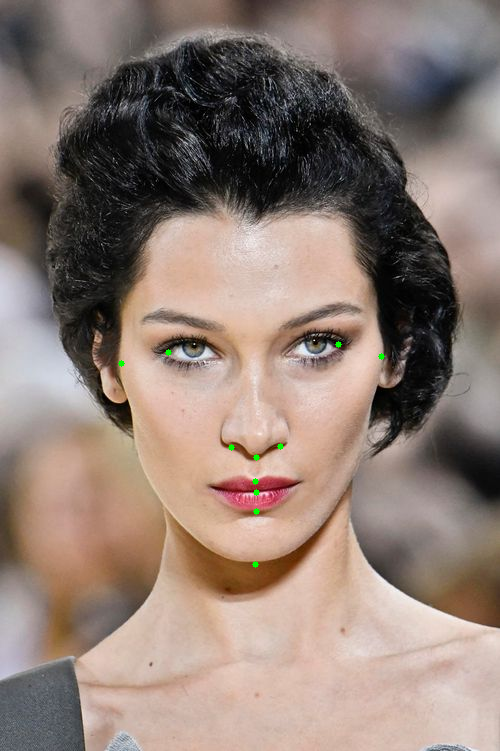

The golden ratio of the person's face is: 2.4353179742999305


In [ ]:
def main():
    # Load the pre-trained model
    model = load_pretrained_model()

    image_path = '/content/bella_hadid.jpg'
    img = preprocess_image(image_path)
    features = model.predict(img)
    landmarks = detect_landmarks(image_path)

    # Drawing face landmarks on the original image
    original_img = cv2.imread(image_path)
    draw_landmarks(original_img, landmarks, [1,15,36,45,31,33,35,8,51,57,66])
    cv2_imshow(original_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Calculating the golden ratio based on the extracted features
    golden_ratio = calculate_golden_ratio(landmarks)

    print(f"The golden ratio of the person's face is: {golden_ratio}")

if __name__ == "__main__":
    main()

```
face edge:  1,15
outer eye to outer eye: 36, 45
Nose: 31,33,35
chin: 8
mouth: 51,56,57
```

Training a model

In [ ]:

!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

--2023-11-27 13:03:40--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2023-11-27 13:03:40--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2023-11-27 13:03:41--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco

In [ ]:
x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SeparableConv2D(64, input_shape=(96, 96, 1), kernel_size=(5, 5), strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.SeparableConv2D(64, kernel_size=(5, 5), strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.SeparableConv2D(64, kernel_size=(3, 3), strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.SeparableConv2D(32, kernel_size=(3, 3), strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.SeparableConv2D(30, kernel_size=(2, 2), strides=1, activation='sigmoid'),
])

model.compile(loss=tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Adam(lr=0.0001),
              metrics=['mse'])

In [ ]:
model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )

Epoch 1/25
30/30 [==============================] - 164s 5s/step - loss: 0.0364 - mse: 0.0364 - val_loss: 0.0353 - val_mse: 0.0353
Epoch 2/25
30/30 [==============================] - 194s 7s/step - loss: 0.0216 - mse: 0.0216 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 3/25
30/30 [==============================] - 154s 5s/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0217 - val_mse: 0.0217
Epoch 4/25
30/30 [==============================] - 138s 5s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 5/25
30/30 [==============================] - 147s 5s/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 6/25
30/30 [==============================] - 151s 5s/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 7/25
30/30 [==============================] - 189s 6s/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 8/25
30/30 [==============================] - 169s 6s/step - loss: 0.0012 - m

1/1 [==============================] - 0s 39ms/step


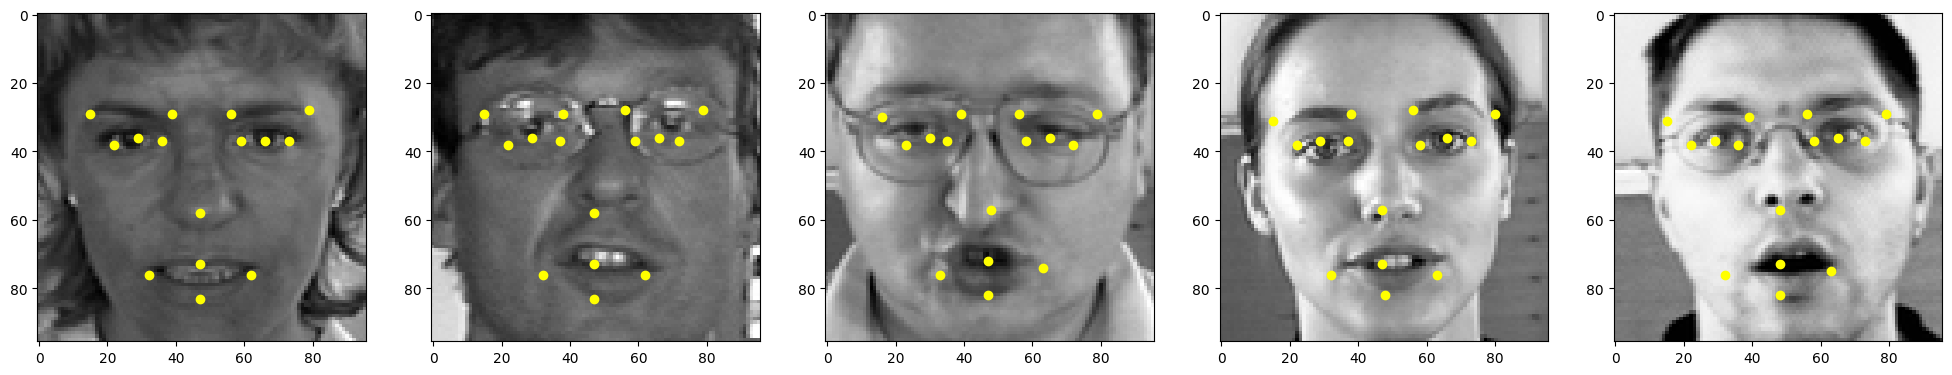

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )

plt.show()

The second CNN model seems to accurately plot the face landmarks even after reducing the number of layer in the model. The original model and results can be viewed in the blog and the CoLab notebook given in the blog itself.

## **CHALLENGES**  
The initial method to implement a golden ratio calculator required the 68 points plotted by the pretrained model and three extra landmarks: Hair line, Top of Head and Pupil. However, the pretrained model allowed very little space to alter the code to include those points or I do not have enough knowledge to go about it yet.   

My initial thoughts were, I may have to annotate the mentioned points manually to the images in the dataset and then training the model on the new dataset. For obvious reasons, this idea was scrapped.

I chose to calculate the golden ration with the given 68 points itself. Therefore, although the model is extremely accurate with face landmarking, the golden ration is a little skewed.

Despite reducing the number of layers in the CNN model, there was a constraint on the resources required to train the model.

## **TAKE AWAYS**

1. What Face Landmarking is.
2. How to work with pretrained models
3. Depthwise Convolution
4. Pointwise Convolution
5. Introduction of Batch Normalisation.

## **REFERENCES**

ChatGPT provided code for the implementation of the pretrained model. Inspiration came from the following blogs about Golden Rations:
1. https://wpcalc.com/en/golden-ratio-face/
2. https://www.calculatorsoup.com/calculators/math/goldenratio.php
3. https://mathworld.wolfram.com/GoldenRatio.html

The second trained model is reference from the blog listed here:
1. https://towardsdatascience.com/face-landmark-detection-with-cnns-tensorflow-cf4d191d2f0